In [1]:
R = PolynomialRing(QQ, 'x')

In [2]:
def plotPoly(polys, name, L, R):
    x = var('x')
    a = plot([],figsize=(8, 8),title=name)
    classic_colors = ['crimson', 'blue', 'green', 'orange', 'purple', 'brown', 'red', 'yellow']
    n = len(polys)
    assert(n > 0)
    assert(len(L) == n and len(R) == n)
    for i in range(n):
        a += plot(polys[i], x, L[i], R[i], color=colors.keys()[i])
    show(a)

In [3]:
def Lagrange(points):
    #x = R.0
    n = len(points)
    assert(n > 1)
    ans = 0
    for i in range(n):
        act = points[i][1]
        for j in range(n):
            if i == j: continue
            act *= (x - points[j][0]) / (points[i][0] - points[j][0])
        ans += act
    return ans

In [4]:
def Newton(points):
    #x = R.0
    n = len(points)
    assert(n > 1)
    memo = matrix(QQ, n, n, 0)
    for i in range(n):
        memo[i, 0] = points[i][1]
    for l in range(1, n):
        for i in range(0, n - l):
            memo[i, l] = (memo[i+1][l-1] - memo[i][l-1]) / (points[i+l][0] - points[i][0])
    ans = 0
    prefix = 1
    for i in range(n):
        ans += prefix * memo[0][i]
        if i + 1 < n: prefix *= (x - points[i][0])   
    return ans

In [5]:
def parsePoly(poly):
    var('x')
    ans = 0
    mono = 1;
    for i in range(len(poly.list())):
        ans += poly.list()[i] * mono
        mono *= x
    return ans

In [10]:
def plotPolylines(groups, name, interpolation):
    polynomials = []
    L = []
    R = []
    for points in groups:
        p = parsePoly(interpolation(points))
        print(p)
        polynomials.append(p)
        minimum = points[0][0]
        maximum = points[0][0]
        for i in range(1, len(points)):
            if points[i][0] < minimum: minimum = points[i][0]
            if points[i][0] > maximum: maximum = points[i][0]
        L.append(minimum)
        R.append(maximum)
    plotPoly(polynomials, name, L, R)

# Tabla 4

19.5000000000000*x + 4.50000000000000
0.0378106821787413*x^3 - 0.568402961396082*x^2 + 2.33603913273400*x + 21.3304071919619
0.119047619047619*x^2 - 1.05952380952381*x + 23.8571428571429


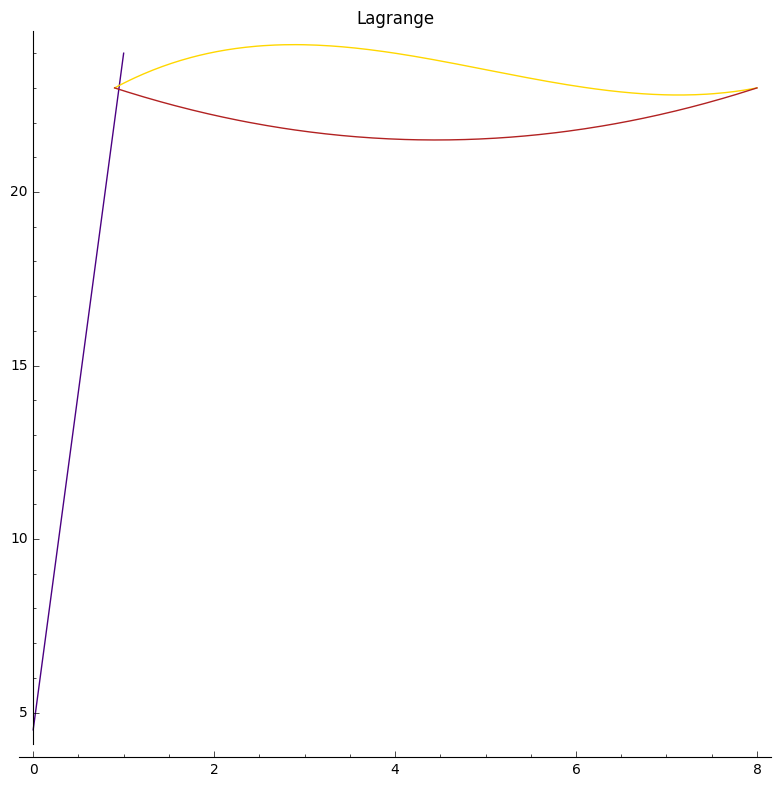

In [14]:
points = [[(0, 4.5), (1, 24)], [(0.9, 23), (4, 24), (7, 22.8), (8, 23)], [(0.9, 23), (4.5, 21.5), (8, 23)]]

plotPolylines(points, "Lagrange", Lagrange)

39/2*x + 9/2
143/3782*x^3 - 0.568402961396087*x^2 + 2.33603913273400*x + 21.3304071919619
5/42*x^2 - 1.05952380952381*x + 23.8571428571429


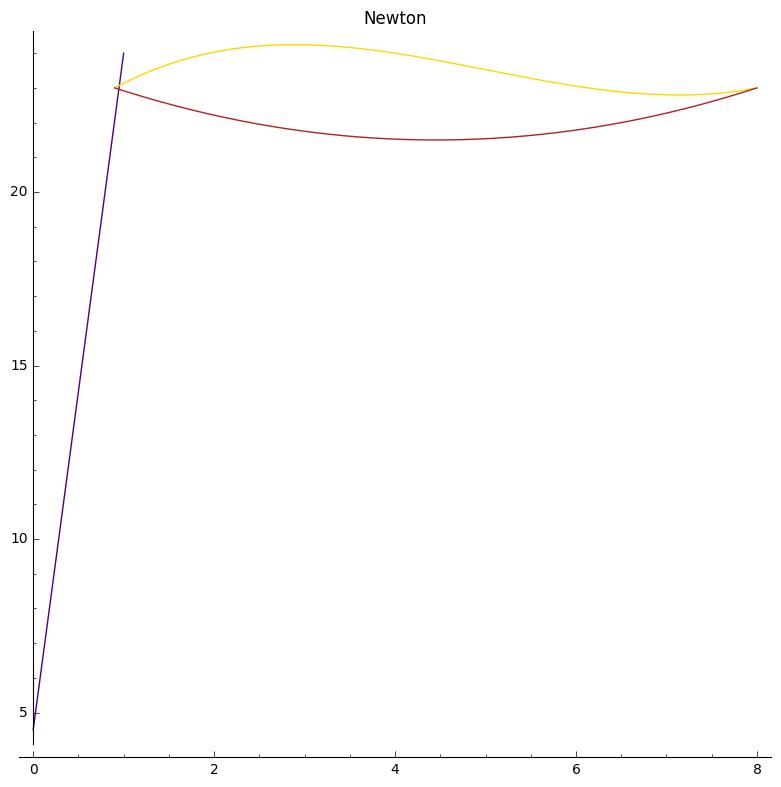

In [15]:
points = [[(0, 4.5), (1, 24)], [(0.9, 23), (4, 24), (7, 22.8), (8, 23)], [(0.9, 23), (4.5, 21.5), (8, 23)]]

plotPolylines(points, "Newton", Newton)

In [16]:
groups = [ [(-8, 0), (8, 0)], [(8, 0), (9.7, 3.6), (10, 5)], [(-12, 9), (0, 4.5), (10, 5)], [(-12, 9), (-9.5, 5), (-8, 0)], [(0, 4.5), (6, 7), (10, 5)], [(0.8, 21), (6, 15), (10, 5)], [(0, 4.5), (1, 7), (2, 13)], [(0.8, 21), (1.8, 15.5), (2, 13)], [(-8.5, 7), (-6, 9), (0.2, 7)], [(-8.5, 7), (-4, 16), (0.8, 19)], [(-1.5, 13), (-1.2, 11.2), (0.2, 7)], [(-1.5, 13), (-0.6, 16.5), (0.8, 19)], [(0, 4.5), (1, 24)], [(0.9, 23), (4, 24), (7, 22.8), (8, 23)], [(0.9, 23), (4.5, 21.5), (8, 23)], [(-10.4, 7), (0, 3), (9.7, 3.5)], [(-7, 2), (-5, 2)], [(-7, 2), (-6, 4), (-5, 2)], [(-14, -2), (-10.5, -1), (-8.5, 1.8)], [(-8.5, 1.8), (-6, -2), (-3.5, 0.3)], [(-3.5, 0.3), (-1.5, -2), (1, 0.5)], [(1, 0.5), (3, -2), (5, 0.3)], [(5, 0.3), (7, -2), (9, 1.3)], [(9, 1.3), (11, -1.5), (13, -2)]]


0
3761113034630401168674838481/2951027150248483463500344360*x^2 - 20.4411764705881*x + 81.9607843137250
17/880*x^2 - 63/440*x + 9/2
-13/30*x^2 - 10.9166666666667*x - 59.6000000000000
-11/120*x^2 + 29/30*x + 9/2
-175/1196*x^2 - 0.158862876254180*x + 21.2207357859532
7/4*x^2 + 3/4*x + 9/2
-211862885696216/36319351833637*x^2 + 9.66666666666668*x + 17.0000000000000
-4/31*x^2 - 1.07096774193548*x + 7.21935483870968
-11630651242227/78665495674699*x^2 + 0.151881720430108*x + 18.9731182795699
98727065269357/55945336985969*x^2 - 1.23529411764706*x + 7.17647058823529
-2938946239099/3213987245626*x^2 + 1.96859903381642*x + 18.0103519668737
39/2*x + 9/2
143/3782*x^3 - 0.568402961396087*x^2 + 2.33603913273400*x + 21.3304071919619
5/42*x^2 - 1.05952380952381*x + 23.8571428571429
12313752859/567464747890*x^2 - 0.158939639628976*x + 3.00000000000000
2
-2*x^2 - 24*x - 68
78/385*x^2 + 5.24935064935065*x + 31.7818181818182
61/125*x^2 + 5.55600000000000*x + 13.7680000000000
88730714307904/185715448551427*

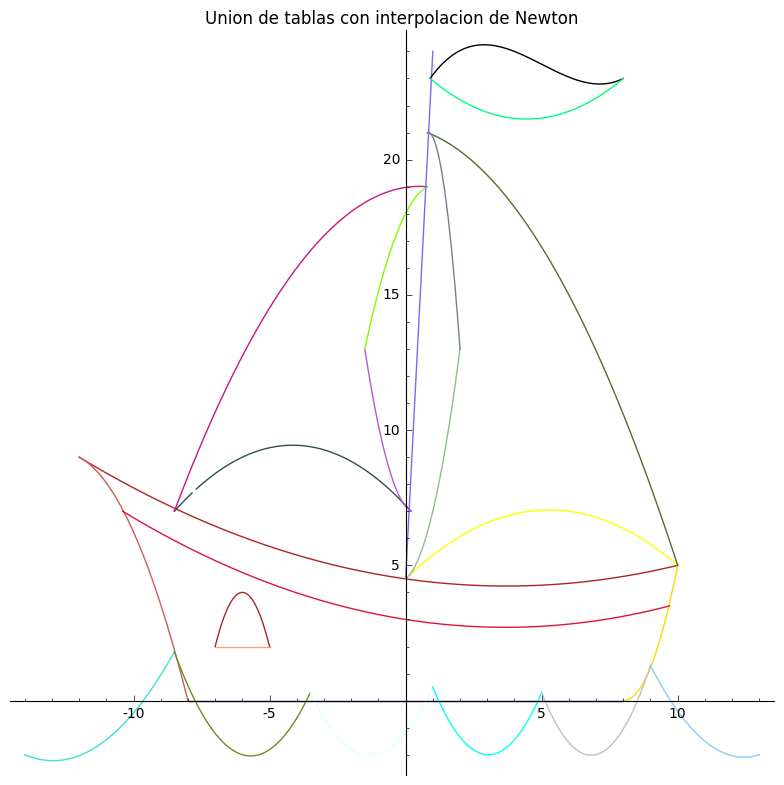

In [17]:
plotPolylines(groups, "Union de tablas con interpolacion de Newton", Newton)

0
1.27450980392156*x^2 - 20.4411764705881*x + 81.9607843137251
0.0193181818181818*x^2 - 0.143181818181818*x + 4.50000000000000
-0.433333333333333*x^2 - 10.9166666666667*x - 59.6000000000000
-0.0916666666666667*x^2 + 0.966666666666666*x + 4.50000000000000
-0.146321070234114*x^2 - 0.158862876254184*x + 21.2207357859532
1.75000000000000*x^2 + 0.750000000000000*x + 4.50000000000000
-5.83333333333334*x^2 + 9.66666666666669*x + 17.0000000000000
-0.129032258064516*x^2 - 1.07096774193548*x + 7.21935483870968
-0.147849462365591*x^2 + 0.151881720430107*x + 18.9731182795699
1.76470588235294*x^2 - 1.23529411764706*x + 7.17647058823530
-0.914423740510697*x^2 + 1.96859903381643*x + 18.0103519668737
19.5000000000000*x + 4.50000000000000
0.0378106821787413*x^3 - 0.568402961396082*x^2 + 2.33603913273400*x + 21.3304071919619
0.119047619047619*x^2 - 1.05952380952381*x + 23.8571428571429
0.0216995908640777*x^2 - 0.158939639628976*x + 3.00000000000000
2
-2*x^2 - 24*x - 68
0.202597402597403*x^2 + 5.24935064

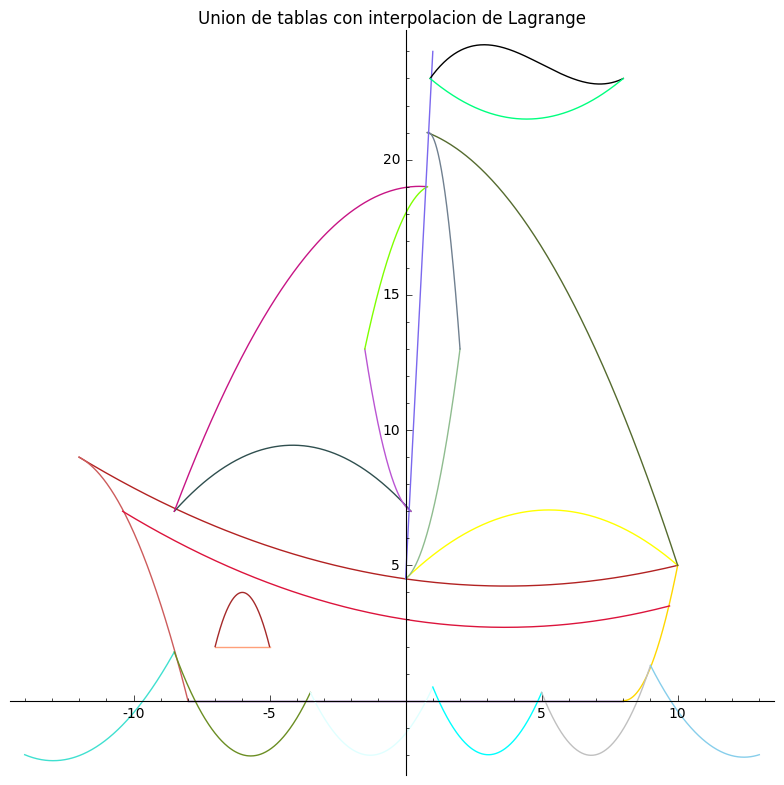

In [18]:
plotPolylines(groups, "Union de tablas con interpolacion de Lagrange", Lagrange)